In [1]:
import pandas as pd
df = pd.read_csv('dataset\\uk_road_accident.csv')


<Axes: xlabel='Year'>

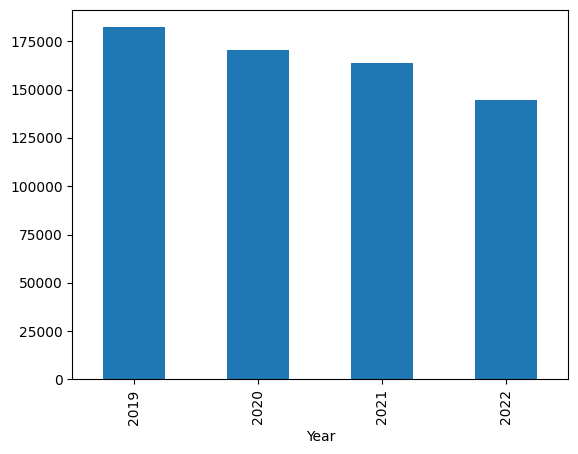

In [2]:
# Step 1: Convert to string only if not null
df['Accident Date'] = df['Accident Date'].astype(str)
# Step 2: Replace '/' with '-' safely
df['Accident Date'] = df['Accident Date'].apply(lambda x: x.replace('/', '-') if pd.notnull(x) else x)
# Step 3: Strip whitespace
df['Accident Date'] = df['Accident Date'].apply(lambda x: x.strip() if pd.notnull(x) else x)
# Step 4: Convert to datetime
df['Accident Date'] = pd.to_datetime(df['Accident Date'], dayfirst=True, errors='coerce')


df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mode()[0])
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mode()[0])
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].fillna('unaccounted')
df['Road_Type'] = df['Road_Type'].fillna('unaccounted')
df['Weather_Conditions'] = df['Weather_Conditions'].fillna('unaccounted')

df.dtypes
df.isnull().sum()

df['Year'] = df['Accident Date'].dt.year
df['Month'] =  df['Accident Date'].dt.month
df['Day'] =  df['Accident Date'].dt.day
df['DayOfWeek'] =  df['Accident Date'].dt.dayofweek
df.isnull().sum()

import matplotlib.pyplot as plt
df.groupby('Year')['Index'].count().plot(kind='bar')

<h1> 1) Data visualization : 'Severe cases of Road Accidents in Sevenoaks monthly by Year (2019-2022) </h1>

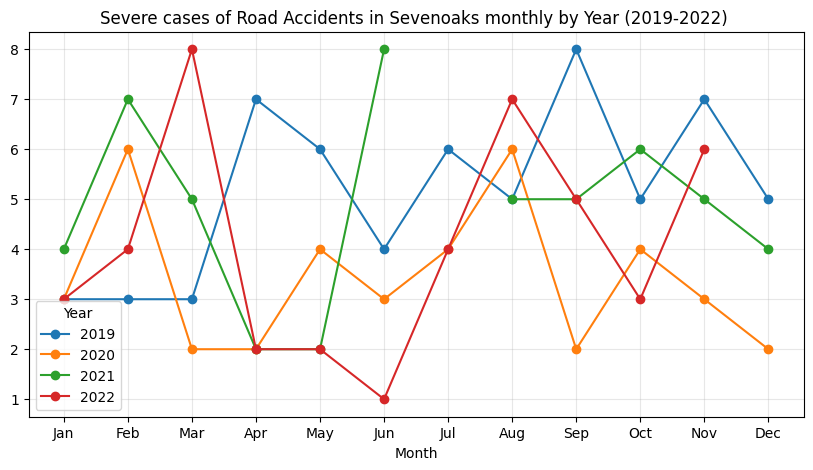

In [3]:
# df.dtype
london_df = df[(df['District Area'] == 'Sevenoaks') & (df['Accident_Severity'] != 'Slight')]
monthly_londondata = london_df.groupby(['Year', 'Month']).size()

monthly_londondata = monthly_londondata.unstack(level=0)

monthly_londondata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Severe cases of Road Accidents in Sevenoaks monthly by Year (2019-2022) '
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

In [4]:
df['District Area'].unique()

array(['Kensington and Chelsea', 'Westminster', 'Richmond upon Thames',
       'Hammersmith and Fulham', 'Hounslow', 'Tower Hamlets',
       'City of London', 'Southwark', 'Camden', 'Hackney', 'Islington',
       'Barnet', 'Brent', 'Haringey', 'Merton', 'Ealing', 'Enfield',
       'Greenwich', 'Newham', 'London Airport (Heathrow)', 'Hillingdon',
       'Waltham Forest', 'Redbridge', 'Barking and Dagenham', 'Bromley',
       'Havering', 'Croydon', 'Lambeth', 'Wandsworth', 'Sutton', 'Bexley',
       'Lewisham', 'Harrow', 'Kingston upon Thames', 'Barrow-in-Furness',
       'South Lakeland', 'Carlisle', 'Eden', 'Allerdale', 'Copeland',
       'Fylde', 'Blackpool', 'Wyre', 'Lancaster', 'Chorley',
       'West Lancashire', 'South Ribble', 'Preston',
       'Blackburn with Darwen', 'Hyndburn', 'Ribble Valley', 'Burnley',
       'Pendle', 'Rossendale', 'Wirral', 'Liverpool', 'Sefton',
       'Knowsley', 'St. Helens', 'Manchester', 'Salford', 'Tameside',
       'Stockport', 'Bolton', 'Wigan', '

<h1> 2) Data visualization : 'Severe cases of Road Accidents in Sevenoaks monthly by Year (2019-2022) </h1>

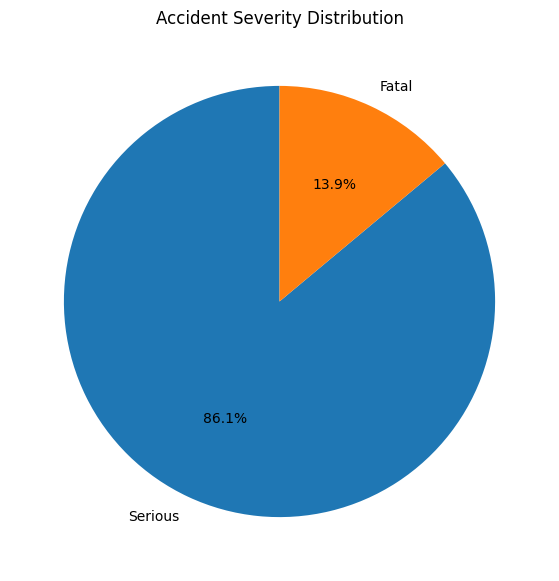

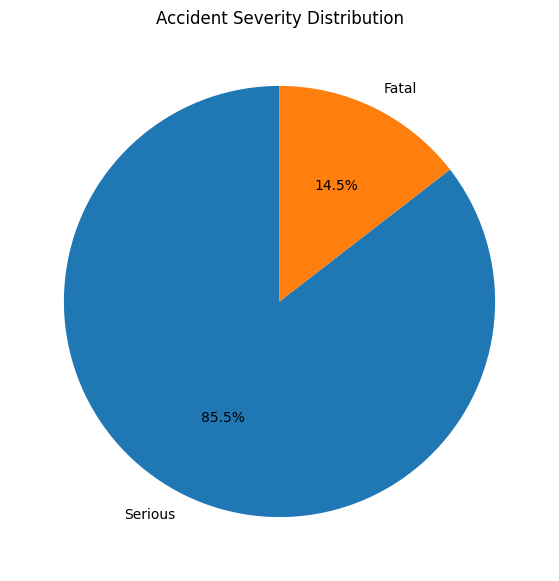

In [5]:
severity_london  = london_df['Accident_Severity'].value_counts()

plt.pie(severity_london,
        labels = severity_london.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_london = london_df[london_df['Year'] == 2019]


# severity_2019
lsc_2019 = severity_2019_london['Accident_Severity'].value_counts()

plt.pie(lsc_2019,
        labels = lsc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()
